In [1]:
import yfinance as yf
import pandas as pd
from pandas_datareader import wb
import datetime as dt
import matplotlib.pyplot as plt
import quandl

In [2]:
def stock_df(ticker):
    stock = yf.Ticker(ticker)
    stock_df = stock.history(start = pd.to_datetime('2011-01-01'), end = pd.to_datetime('today'))
    return stock_df

### Get inflation

In [20]:
import cpi

inflation_rate = []
cpi_values = []
datetime_values = []


years = 22
#subtract by years + 1 because we need annual inflation by grabbing the year before's values
start_year = dt.date.today().year - (years+1)
reset_months = 1
months =  ( (years + 1) * 12) + (dt.date.today().month-1)

for i in range(months):
    
    if reset_months > 12: 
        reset_months = 1
        start_year +=1
        
    datetime_values.append(dt.date(start_year, reset_months, 1))
    
    cpi_data = cpi.get(dt.date(start_year, reset_months, 1))
    cpi_values.append(cpi_data)
     
    reset_months += 1
    
    if i >= 12:
        inflation = (cpi_values[i] - cpi_values[i-12]) / cpi_values[i-12]
        inflation_rate.append(inflation)

datetime_values = datetime_values[12:]
  
inflation_df = pd.DataFrame(data = {"Inflation Rate": inflation_rate}, index = datetime_values)  
inflation_df["Percent Change"] = inflation_df["Inflation Rate"].pct_change()
inflation_df
    
# ( cpi.get(date(2022,1,1)) - cpi.get(date(2021,1,1)) ) / cpi.get(date(2021,1,1))

,Inflation Rate,Percent Change
2000-01-01,0.027389,NaN
2000-02-01,0.032219,0.176346
2000-03-01,0.037576,0.166266
2000-04-01,0.030686,-0.183359
2000-05-01,0.031889,0.039216
...,...,...
2021-09-01,0.053903,0.026484
2021-10-01,0.062219,0.154261
2021-11-01,0.068090,0.094366
2021-12-01,0.070364,0.033397


In [30]:
inflation_df.reset_index(inplace = True)

inflation_df["Date"] = pd.to_datetime(inflation_df["index"])
inflation_df

inflation_df = pd.DataFrame(inflation_df.groupby(inflation_df['Date'].dt.year)["Inflation Rate"].agg("mean"))
inflation_df

,Inflation Rate
Date,
2000,0.033760
2001,0.028317
2002,0.015856
2003,0.022723
2004,0.026759
2005,0.033903
2006,0.032352
2007,0.028524
2008,0.038456


,country,year,NY.GDP.MKTP.CD,Percent Change
0,United States,2000,10252345464000,NaN
1,United States,2001,10581821399000,3.213664
2,United States,2002,10936419054000,3.351008
3,United States,2003,11458243878000,4.771441
4,United States,2004,12213729147000,6.593377
5,United States,2005,13036640230000,6.737591
6,United States,2006,13814611414000,5.967574
7,United States,2007,14451858656000,4.612850
8,United States,2008,14712844084000,1.805895
9,United States,2009,14448933025000,-1.793746


<AxesSubplot:>

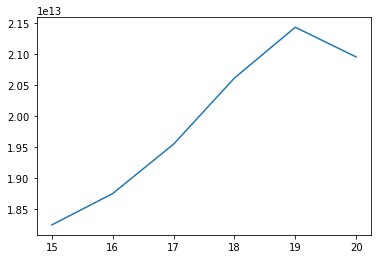

In [27]:
usa_gdp = wb.download(country = "USA", indicator = "NY.GDP.MKTP.CD", start = 2000, end = date.today().year)
usa_gdp = usa_gdp.iloc[::-1]
usa_gdp.reset_index(inplace = True)
usa_gdp["Percent Change"] = usa_gdp["NY.GDP.MKTP.CD"].pct_change() * 100
display(usa_gdp)
usa_gdp["NY.GDP.MKTP.CD"][15:].plot()

300

## gdp function
    

In [110]:
import nasdaqdatalink
mydata = nasdaqdatalink.get("FRED/GDP")
mydata = mydata/1000
# mydata.plot()

In [111]:
start_year = dt.date.today().year - (years)
start_year
mydata

,Value
Date,
1947-01-01,0.243164
1947-04-01,0.245968
1947-07-01,0.249585
1947-10-01,0.259745
1948-01-01,0.265742
...,...
2020-10-01,21.477597
2021-01-01,22.038226
2021-04-01,22.740959


In [112]:
mydata1 = mydata.reset_index()
mydata1

for i in range(len(mydata1)):
    entry_year = mydata1.iloc[i,0].date().year
    if entry_year == start_year:
        mydata1 = mydata1[i:]
        break

In [119]:
mydata1.set_index("Date")

,Value
Date,
2000-01-01,10.002179
2000-04-01,10.247720
2000-07-01,10.318165
2000-10-01,10.435744
2001-01-01,10.470231
...,...
2020-10-01,21.477597
2021-01-01,22.038226
2021-04-01,22.740959


In [116]:
# mydata.reset_index(inplace = True)
# mydata.dtypes


mydata = pd.DataFrame(mydata1.groupby(mydata1['Date'].dt.year)["Value"].agg("mean"))
mydata.rename(columns = {"Value": "USA GDP in $ Trillions"}, inplace = True)

# mydata.plot()
# df.groupby(df['date'].dt.year)['a'].agg(['sum', 'mean', 'max'])

In [117]:
mydata

,USA GDP in $ Trillions
Date,
2000,10.250952
2001,10.581929
2002,10.929108
2003,11.456450
2004,12.217196
2005,13.039197
2006,13.815583
2007,14.474227
2008,14.769862


### get employment

<AxesSubplot:xlabel='Date'>

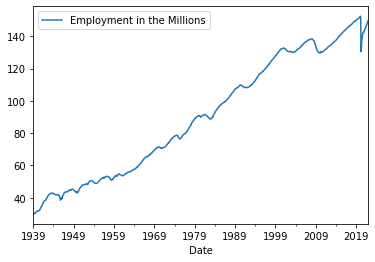

In [127]:
unemployment_data = nasdaqdatalink.get("FRED/PAYEMS")
unemployment_data/=1000


unemployment_data.rename(columns = {"Value": "Employment in the Millions"}, inplace = True)
unemployment_data.plot()

In [123]:
unemployment_data

,Employment in the Millions
Date,
1939-01-01,29.923
1939-02-01,30.100
1939-03-01,30.280
1939-04-01,30.094
1939-05-01,30.299
...,...
2021-09-01,147.328
2021-10-01,148.005
2021-11-01,148.652


In [128]:
unemployment_data.reset_index(inplace = True)
unemployment_data = pd.DataFrame(unemployment_data.groupby(unemployment_data['Date'].dt.year)["Employment in the Millions"].nth(-1))
unemployment_data

,Employment in the Millions
Date,
1939,31.542
1940,34.174
1941,38.104
1942,41.915
1943,42.746
...,...
2018,149.821
2019,151.789
2020,142.497
